In [1]:
import tensorflow as tf
import numpy as np
from fetch_data import qm9_parse, qm9_fetch

In [3]:
qm9_records = qm9_fetch()
data = qm9_parse(qm9_records)


 2.09%

KeyboardInterrupt: 

In [4]:
from rdkit import Chem
import networkx as nx

In [12]:
smiles = 'O'
mol = Chem.MolFromSmiles(smiles)

# Get adjacency matrix
adjacency_matrix = Chem.GetAdjacencyMatrix(mol, useBO = True)

# Convert adjacency matrix to NetworkX graph
G = nx.from_numpy_array(adjacency_matrix)

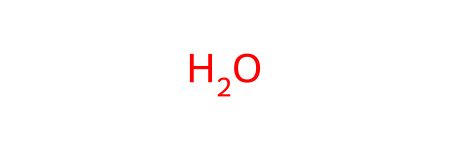

In [13]:
mol

In [14]:

suppl = Chem.SDMolSupplier('gdb9/gdb9.sdf') # name the path of the SDF file


In [16]:
for mol in suppl:
    print(mol.GetNumAtoms()) # give the number of atoms in each molecule
    break

1


In [18]:
type(mol)

rdkit.Chem.rdchem.Mol

In [19]:
mol.GetAtoms()

In [20]:
for i, atom in enumerate(mol.GetAtoms()):
    positions = mol.GetConformer().GetAtomPosition(i)
    print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.0127 1.0858 0.008


In [21]:
mol.GetNumAtoms()

1

In [23]:
mol.GetAtomPosition()

AttributeError: 'Mol' object has no attribute 'GetAtomPosition'

In [29]:
text = suppl.GetItemText(0)

In [30]:
num_atoms = mol.GetNumAtoms()
pos = text.split('\n')[4:4 + num_atoms]
pos = [[float(x) for x in line.split()[:3]] for line in pos]

In [31]:
pos

[[-0.0127, 1.0858, 0.008]]

In [33]:
p = mol.GetConformer().GetAtomPosition(0)

In [34]:
p.x

-0.0127

In [35]:
p.y

1.0858

In [36]:
p.z

0.008